In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from shapely.geometry import Polygon

In [2]:
def create_harmonic_rectangles(center, span, lower_harmonic, higher_harmonic):
    rectangles = []
    for h in range(lower_harmonic, higher_harmonic + 1):
        x = center * h - span * h / 2
        width = span * h
        rect = Polygon([(x, 0), (x + width, 0), (x + width, 1), (x, 1)])
        rectangles.append(rect)
    return rectangles

In [33]:
def plot_harmonics(rectangles, colors, center, span, lower_harmonic, higher_harmonic):
    fig, ax = plt.subplots(figsize=(20, 15))
    overlap_counts = [0] * len(rectangles)
    
    for i, rect in enumerate(rectangles):
        bounds = rect.bounds
        ax.add_line(plt.Line2D((rect.bounds[0],rect.bounds[0]), (rect.bounds[1]-0.05,rect.bounds[3]+0.05), linewidth=1, linestyle='dashed', color=colors[i]))
        ax.add_line(plt.Line2D((rect.bounds[2],rect.bounds[2]), (rect.bounds[1]-0.05,rect.bounds[3]+0.05), linewidth=1, linestyle='dashed', color=colors[i]))
        ax.add_patch(patches.Rectangle((bounds[0], bounds[1]), bounds[2] - bounds[0], bounds[3] - bounds[1], 
                                       fill=False, edgecolor=colors[i], linewidth=7, label=f'h = {i+lower_harmonic}'))

    # Overlap and intersection handling
    for i, rect1 in enumerate(rectangles):
        for j, rect2 in enumerate(rectangles[i+1:], start=i+1):
            if rect1.intersects(rect2):
                overlap_counts[i] += 1
                overlap_counts[j] += 1
                
                intersection = rect1.intersection(rect2)
                intersection_coords = np.array(intersection.exterior.coords.xy).T
                ax.add_patch(patches.Polygon(intersection_coords, closed=True, fill=True, facecolor='g', alpha=0.1))
    
    lower_limit = (center - 1*span)*lower_harmonic
    upper_limit = (center + 1*span)*higher_harmonic
    for i, count in enumerate(overlap_counts):
        print(f"Harmonic {i+lower_harmonic} overlaps with {count} other harmonics")
        
    ax.set_xlim(lower_limit, upper_limit)
    ax.set_ylim(-0.1, 1.1)
    ax.set_xlabel(r"Revolution frequency, $f$ (MHz)", fontsize=34)
    ax.set_ylabel(r"Amplitude (arb. units)", fontsize=34)
    ax.set_title("Harmonic overlap", fontsize=38)    
    ax.tick_params(axis='both', which='major', labelsize=34)
    ax.legend(fontsize = 24)
    plt.show()

Harmonic 1 overlaps with 0 other harmonics
Harmonic 2 overlaps with 0 other harmonics
Harmonic 3 overlaps with 0 other harmonics
Harmonic 4 overlaps with 0 other harmonics
Harmonic 5 overlaps with 0 other harmonics
Harmonic 6 overlaps with 0 other harmonics
Harmonic 7 overlaps with 0 other harmonics
Harmonic 8 overlaps with 0 other harmonics
Harmonic 9 overlaps with 0 other harmonics


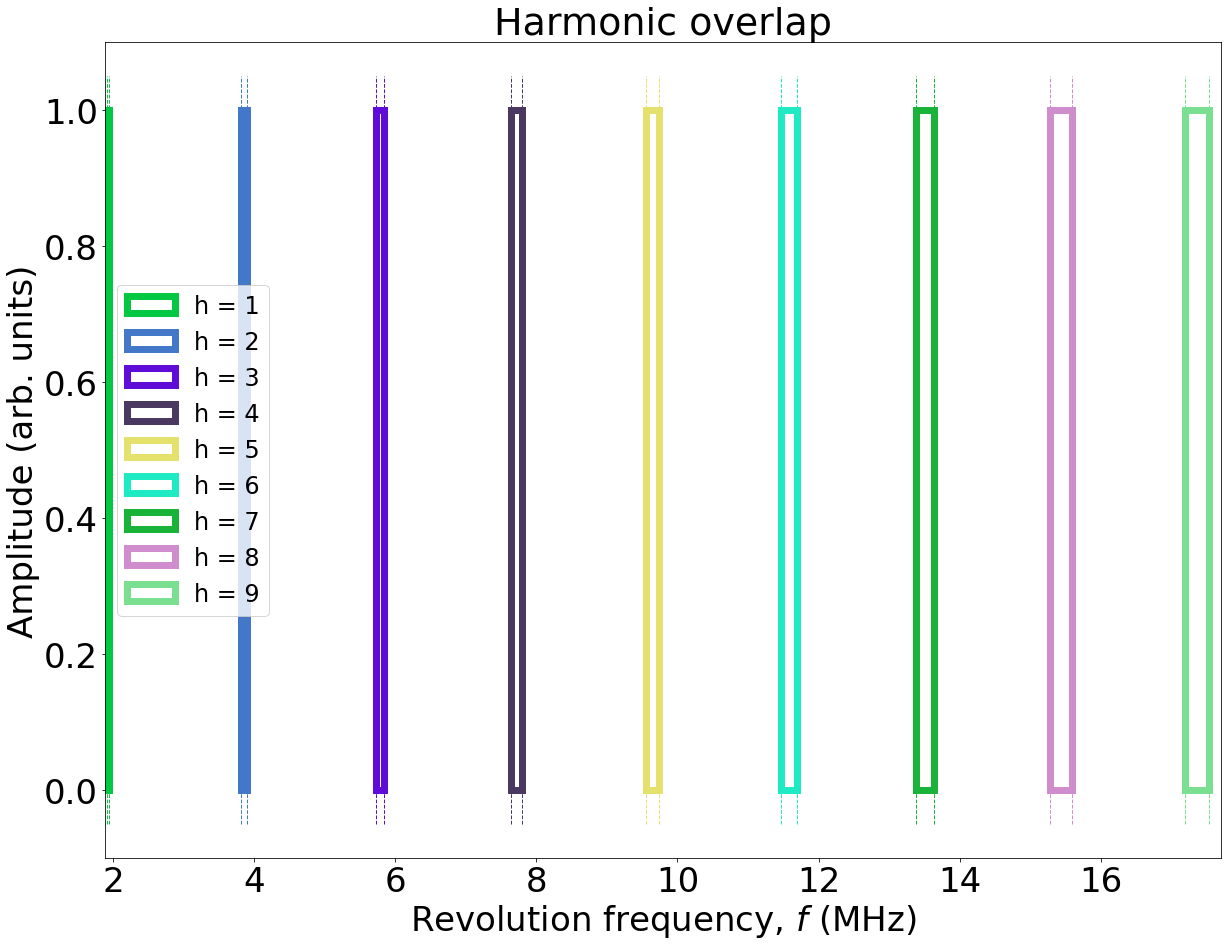

In [34]:
# Example of configuration of the observed peaks within the same harmonic
center = 1929406.65555556 / 1e6 # Center of the distribution
span = 37648.8492063492   / 1e6  # Span of the distribution
lower_harmonic = 1        # Harmonics to simulate
higher_harmonic = 9
num_harmonics = higher_harmonic - lower_harmonic
colors = np.random.rand(num_harmonics+1, 3)

# Generate and plot harmonics
rectangles = create_harmonic_rectangles(center, span, lower_harmonic, higher_harmonic)
plot_harmonics(rectangles, colors, center, span, lower_harmonic, higher_harmonic)

Harmonic 123 overlaps with 2 other harmonics
Harmonic 124 overlaps with 3 other harmonics
Harmonic 125 overlaps with 4 other harmonics
Harmonic 126 overlaps with 4 other harmonics
Harmonic 127 overlaps with 4 other harmonics
Harmonic 128 overlaps with 4 other harmonics
Harmonic 129 overlaps with 3 other harmonics
Harmonic 130 overlaps with 2 other harmonics


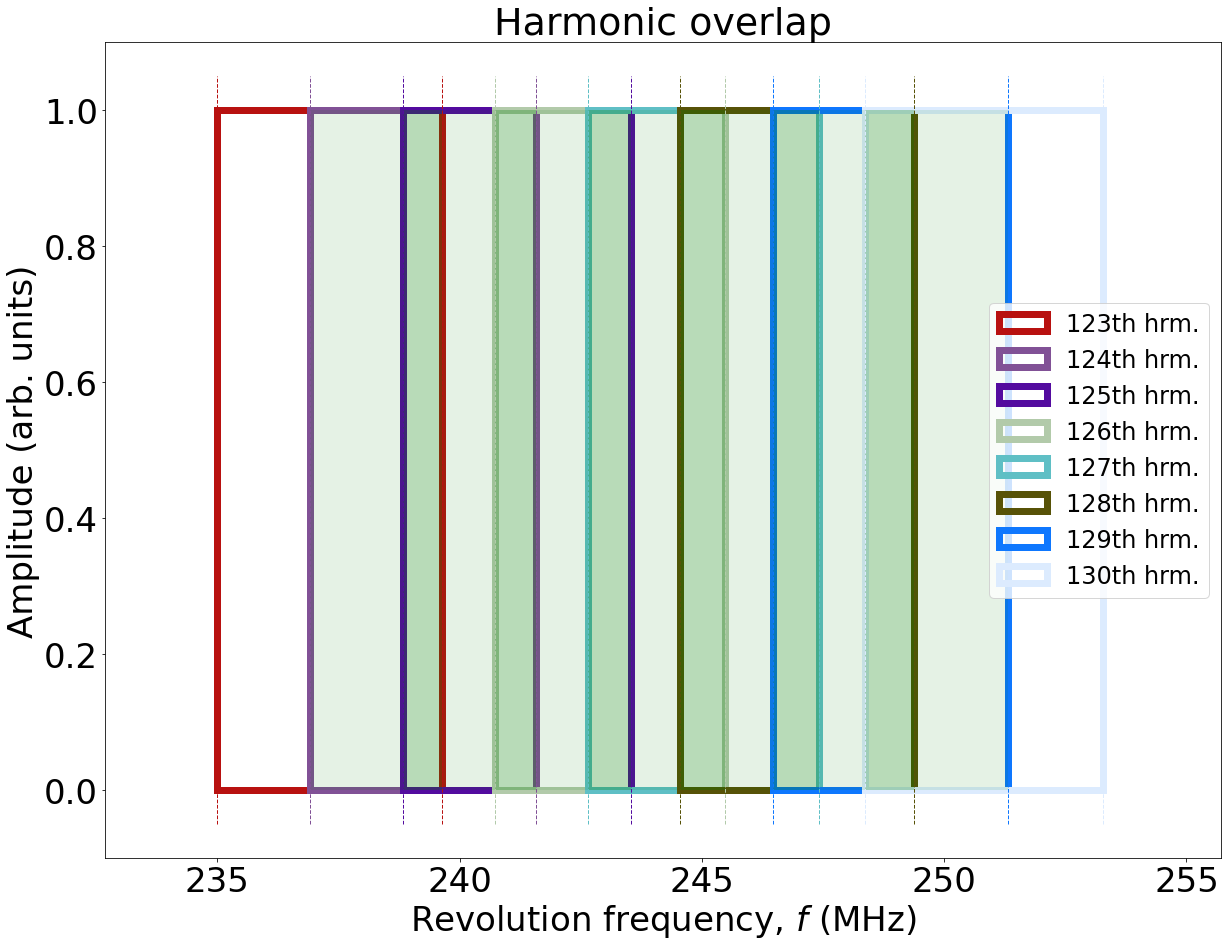

In [26]:
# Example of configuration of the observed peaks within the same harmonic
center = 1929406.65555556 / 1e6 # Center of the distribution
span = 37648.8492063492   / 1e6  # Span of the distribution
lower_harmonic = 123        # Harmonics to simulate
higher_harmonic = 130
num_harmonics = higher_harmonic - lower_harmonic
colors = np.random.rand(num_harmonics+1, 3)

# Generate and plot harmonics
rectangles = create_harmonic_rectangles(center, span, lower_harmonic, higher_harmonic)
plot_harmonics(rectangles, colors, center, span, lower_harmonic, higher_harmonic)

Harmonic 208 overlaps with 4 other harmonics
Harmonic 209 overlaps with 5 other harmonics
Harmonic 210 overlaps with 6 other harmonics
Harmonic 211 overlaps with 6 other harmonics
Harmonic 212 overlaps with 6 other harmonics
Harmonic 213 overlaps with 5 other harmonics
Harmonic 214 overlaps with 4 other harmonics


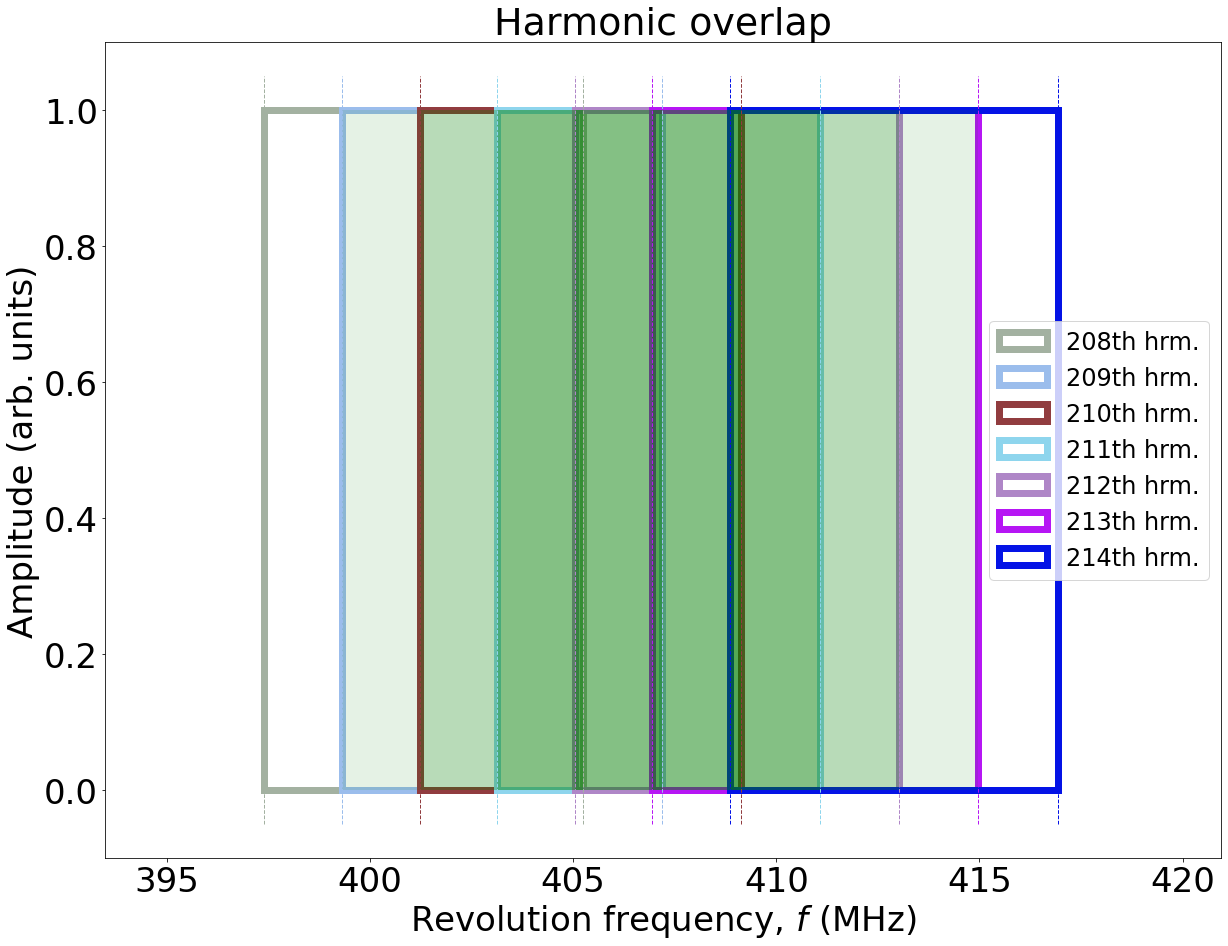

In [27]:
# Example of configuration of the observed peaks within the same harmonic
center = 1929406.65555556 / 1e6 # Center of the distribution
span = 37648.8492063492   / 1e6  # Span of the distribution
lower_harmonic = 208        # Harmonics to simulate
higher_harmonic = 214
num_harmonics = higher_harmonic - lower_harmonic
colors = np.random.rand(num_harmonics+1, 3)

# Generate and plot harmonics
rectangles = create_harmonic_rectangles(center, span, lower_harmonic, higher_harmonic)
plot_harmonics(rectangles, colors, center, span, lower_harmonic, higher_harmonic)